In [1]:
# Importing the libraries

import csv
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import uuid
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize

from nltk import pos_tag



from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
import re

from pandas.core.common import flatten
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 

  
lemmatizer = WordNetLemmatizer() 



/Users/gowthamasokan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## Topic modeling

In [5]:
# Loading the text

Syllabi = pd.read_excel("Syllabi collection - PIT-UN Fall 2022.xlsx")
Syllabi

,University,Course,Link,Status,Text,Notes,Pre-processed text 1,Pre-processed text 2,Pre-processed text 3
0,Arizona State University,Principles of Public Interest Technology,https://webapp4.asu.edu/bookstore/viewsyllabus...,Not Found,PIT 501: Principles of Public Interest Techno...,NaN,PIT 501: Principles of Public Interest Technol...,PIT 501: Principles of Public Interest Technol...,"['pit', 'principle', 'public', 'interest', 'te..."
1,Boston University,XCC433: Justice Media co-Lab,https://www.bu.edu/cds-faculty/files/2021/04/C...,Found,THE JUSTICE MEDIA CO-LAB Journalism is strong...,NaN,THE JUSTICE MEDIA CO-LAB Journalism is stronge...,THE JUSTICE MEDIA CO-LAB Journalism is stronge...,"['justice', 'medium', 'colab', 'journalism', '..."
2,Boston University,Law & Algorithms,https://cs-people.bu.edu/kaptchuk/teaching/ds4...,Found,Page 1 of 8 Law and Algorithms – Spring 2022 ...,NaN,Page 1 of 8 Law and Algorithms – Spring 2022 S...,Page 1 of 8 Law and Algorithms – Spring 2022 S...,"['page', 'law', 'algorithm', 'spring', 'syllab..."
3,Boston University,Data Science for Politics,NaN,Found,NaN,"Need link, ask David Palmer",NaN,NaN,['nan']
4,Cal Poly State,The art of ethical design,NaN,Found,View Static Version Course Principles. Student...,No difference between processed text 1 and 2,View Static Version Course Principles. Student...,View Static Version Course Principles. Student...,"['view', 'static', 'version', 'course', 'princ..."
...,...,...,...,...,...,...,...,...,...
104,Carnegie Mellon,Managing Disruptive Technologies,https://api.heinz.cmu.edu/courses_api/course/s...,Found,Managing Disruptive Technologies (MDT) (outlin...,NaN,Managing Disruptive Technologies (MDT) (outlin...,Managing Disruptive Technologies (MDT) (outlin...,"['managing', 'disruptive', 'technology', 'mdt'..."
105,Carnegie Mellon,Managing Information Technology,https://api.heinz.cmu.edu/courses_api/course/s...,Found,Week Lecture Topic Readings Week 1 Evolution o...,NaN,Week Lecture Topic Readings Week 1 Evolution o...,Week Lecture Topic Readings Week 1 Evolution o...,"['week', 'lecture', 'topic', 'reading', 'week'..."
106,Carnegie Mellon,Malicious Code Analysis,https://api.heinz.cmu.edu/courses_api/course/s...,Found,P a g e 1 | 4\nMALICIOUS CODE ANALYSIS\nCarneg...,NaN,P a g e 1 | 4\nMALICIOUS CODE ANALYSIS\nCarneg...,P a g e 1 | 4\nMALICIOUS CODE ANALYSIS\nCarneg...,"['malicious', 'code', 'analysis', 'carnegie', ..."
107,Northeastern,SUEN 7230. Urban Ecologies and Technologies,https://www.coursehero.com/file/36688907/Urban...,Found,Urban Ecologies & Technologies I\nUrban Ecolog...,NaN,Urban Ecologies & Technologies I\n Urban Ecolo...,Urban Ecologies & Technologies I\n Urban Ecolo...,"['urban', 'ecology', 'technology', 'urban', 'e..."


In [ ]:
# Importing and adding stop words

nltk.download('stopwords')
stop = stopwords.words('english')
stop_add = ['said', 'year', 'like', 'says', 'years', 'month', 'months', 'day', 'days', 'say', 'would', 'in', 'of', '.', ',',':',';','`',"''",'s','-']
for new in stop_add:
    stop.append(new)
    
# Function to remove stopwords

def remove_stopwords(text):
    
    stop.extend(["also", "and", "its", "bring", "got", "from", "lot", "rather", "even", "from", "but","that","in","you","who","to", "of", "become", "thats", "looking", "the", "of", "for"])
    words = [w for w in text if w not in stop_words]
    
    return words





In [ ]:
def remove_emails(dataframe):
    no_emails = dataframe.str.replace(r"\S*@\S*\s?","", regex=True)
    return no_emails

def remove_nan(dataframe):
    """Pass in a dataframe to remove NAN from those columns."""
    return dataframe.dropna()

def lowercase(dataframe):
    
    lowercase_dataframe = dataframe.apply(lambda x: x.lower())
    return lowercase_dataframe


def remove_special_characters(dataframe):
    
    no_special_characters = dataframe.replace(r'[^A-Za-z0-9 ]+', '', regex=True)
    return no_special_characters

def remove_numbers(dataframe):
    
    removed_numbers = dataframe.str.replace(r'\d+','')
    return removed_numbers

def remove_whitespace(dataframe):
    
    # replace more than 1 space with 1 space
    merged_spaces = dataframe.str.replace(r"\s\s+",' ')
    # delete beginning and trailing spaces
    trimmed_spaces = merged_spaces.apply(lambda x: x.str.strip())
    return trimmed_spaces

def remove_website_links(dataframe):
    
    no_website_links = dataframe.str.replace(r"http\S+", "")
    return no_website_links

def tokenize(dataframe):
    tokenized_dataframe = dataframe.apply(lambda row: word_tokenize(row))
    return tokenized_dataframe
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

lemmatized = []
#for s in str_list:
    #lemmatized.append(lemmatizer.lemmatize(s))

In [6]:
# Processing all the text for the third version




Syllabi['Processed_text_3'] = lowercase(Syllabi['Pre-processed text 2'].astype(str))
Syllabi['Processed_text_3'] = Syllabi["Processed_text_3"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
Syllabi['Processed_text_3'] = remove_special_characters(Syllabi['Processed_text_3'])
Syllabi['Processed_text_3'] = remove_numbers(Syllabi['Processed_text_3'])
Syllabi['Processed_text_3'] = remove_website_links(Syllabi['Processed_text_3'])
Syllabi['Processed_text_3'] = Syllabi["Processed_text_3"].apply(lemmatize_text)
Syllabi['Processed_text_3'].iloc[0]





<ipython-input-4-c3cfe803ec67>:22: FutureWarning: The default value of regex will change from True to False in a future version.
  removed_numbers = dataframe.str.replace(r'\d+','')
<ipython-input-4-c3cfe803ec67>:35: FutureWarning: The default value of regex will change from True to False in a future version.
  no_website_links = dataframe.str.replace(r"http\S+", "")


['pit',
 'principle',
 'public',
 'interest',
 'technology',
 'professor',
 'zoom',
 'office',
 'office',
 'hour',
 'tuesday',
 'needed',
 'please',
 'email',
 'schedule',
 'zoom',
 'office',
 'appointment',
 'course',
 'description',
 'course',
 'introduces',
 'student',
 'fundamental',
 'public',
 'interest',
 'technology',
 'pit',
 'including',
 'key',
 'concept',
 'theory',
 'framework',
 'student',
 'identify',
 'analyze',
 'stakeholder',
 'societal',
 'dimension',
 'policy',
 'issue',
 'context',
 'current',
 'emerging',
 'technology',
 'facial',
 'recognition',
 'technology',
 'biotechnology',
 'artificial',
 'intelligence',
 'financial',
 'technology',
 'student',
 'introduced',
 'importance',
 'sociotechnical',
 'change',
 'public',
 'value',
 'anticipatory',
 'governance',
 'disclaimer',
 'syllabus',
 'used',
 'guideline',
 'only',
 'information',
 'provided',
 'summary',
 'topic',
 'covered',
 'class',
 'information',
 'contained',
 'document',
 'assignment',
 'grading',
 's

In [7]:
# Creating the clean corpus ready for topic modeling

clean_corpus = [doc for doc in Syllabi['Processed_text_3']]
clean_corpus

[['pit',
  'principle',
  'public',
  'interest',
  'technology',
  'professor',
  'zoom',
  'office',
  'office',
  'hour',
  'tuesday',
  'needed',
  'please',
  'email',
  'schedule',
  'zoom',
  'office',
  'appointment',
  'course',
  'description',
  'course',
  'introduces',
  'student',
  'fundamental',
  'public',
  'interest',
  'technology',
  'pit',
  'including',
  'key',
  'concept',
  'theory',
  'framework',
  'student',
  'identify',
  'analyze',
  'stakeholder',
  'societal',
  'dimension',
  'policy',
  'issue',
  'context',
  'current',
  'emerging',
  'technology',
  'facial',
  'recognition',
  'technology',
  'biotechnology',
  'artificial',
  'intelligence',
  'financial',
  'technology',
  'student',
  'introduced',
  'importance',
  'sociotechnical',
  'change',
  'public',
  'value',
  'anticipatory',
  'governance',
  'disclaimer',
  'syllabus',
  'used',
  'guideline',
  'only',
  'information',
  'provided',
  'summary',
  'topic',
  'covered',
  'class',


In [8]:
# Dictionary of unique terms of the text

from gensim.corpora import Dictionary


dict_ = Dictionary(clean_corpus)
print(dict_)

Dictionary<6733 unique tokens: ['a', 'able', 'academic', 'accessibility', 'accessible']...>


In [9]:
# Creating the numerically encoded document term matrix to feed into the LDA topic model
import gensim

doc_term_matrix = [dict_.doc2bow(i) for i in clean_corpus]
doc_term_matrix

[[(0, 3),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 2),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 3),
  (15, 3),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 3),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 4),
  (26, 3),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 3),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 2),
  (35, 1),
  (36, 4),
  (37, 1),
  (38, 3),
  (39, 2),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 2),
  (47, 3),
  (48, 1),
  (49, 8),
  (50, 3),
  (51, 1),
  (52, 2),
  (53, 1),
  (54, 3),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 3),
  (59, 1),
  (60, 9),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 2),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 2),
  (72, 2),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 2),
  (77, 1),
  (78, 2),
  (79, 1),
  (80, 1),
  (81, 7),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 2),
  (86, 4),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 1),
  (91, 1)

In [10]:
# Training the initial LDA model

LDA = gensim.models.ldamodel.LdaModel

ldamodel = LDA(doc_term_matrix, num_topics = 6, id2word = dict_, passes=20, random_state=0, eval_every=None)

In [165]:
# Outputting the topics from the model

ldamodel.print_topics()

/Users/gowthamasokan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.033*"energy" + 0.009*"technology" + 0.008*"reading" + 0.007*"system" + 0.007*"electricity" + 0.006*"u" + 0.006*"power" + 0.006*"course" + 0.005*"group" + 0.005*"renewable"'),
 (1,
  '0.011*"student" + 0.010*"science" + 0.009*"policy" + 0.009*"technology" + 0.009*"course" + 0.008*"class" + 0.007*"data" + 0.006*"work" + 0.006*"assignment" + 0.006*"nan"'),
 (2,
  '0.016*"student" + 0.014*"data" + 0.013*"course" + 0.010*"week" + 0.008*"assignment" + 0.007*"reading" + 0.007*"technology" + 0.007*"class" + 0.006*"science" + 0.006*"project"'),
 (3,
  '0.012*"class" + 0.009*"student" + 0.007*"course" + 0.007*"ai" + 0.006*"project" + 0.006*"memo" + 0.004*"use" + 0.004*"programming" + 0.003*"learning" + 0.003*"understanding"'),
 (4,
  '0.012*"data" + 0.012*"course" + 0.008*"information" + 0.007*"social" + 0.007*"class" + 0.007*"student" + 0.007*"assignment" + 0.006*"essay" + 0.006*"discussion" + 0.006*"week"'),
 (5,
  '0.014*"course" + 0.011*"student" + 0.009*"class" + 0.008*"week" + 0.

In [173]:
ldamodel_3 = LDA(doc_term_matrix, num_topics = 3, id2word = dict_, passes=20, random_state=0, eval_every=None)

ldamodel_3.print_topics()

/Users/gowthamasokan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.022*"energy" + 0.007*"data" + 0.007*"reading" + 0.006*"week" + 0.006*"course" + 0.006*"technology" + 0.005*"system" + 0.004*"spatial" + 0.004*"electricity" + 0.004*"science"'),
 (1,
  '0.011*"course" + 0.010*"science" + 0.009*"technology" + 0.009*"student" + 0.008*"class" + 0.007*"data" + 0.007*"policy" + 0.005*"assignment" + 0.005*"social" + 0.004*"reading"'),
 (2,
  '0.015*"student" + 0.013*"course" + 0.010*"data" + 0.010*"week" + 0.008*"class" + 0.007*"assignment" + 0.005*"information" + 0.005*"reading" + 0.005*"discussion" + 0.005*"project"')]

In [175]:
ldamodel_9 = LDA(doc_term_matrix, num_topics = 9, id2word = dict_, passes=20, random_state=0, eval_every=None)

ldamodel_9.print_topics()

/Users/gowthamasokan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.050*"energy" + 0.013*"technology" + 0.011*"system" + 0.010*"electricity" + 0.008*"renewable" + 0.008*"power" + 0.008*"u" + 0.008*"fuel" + 0.007*"reading" + 0.007*"policy"'),
 (1,
  '0.010*"course" + 0.010*"student" + 0.009*"technology" + 0.008*"assignment" + 0.008*"class" + 0.007*"page" + 0.006*"work" + 0.006*"week" + 0.006*"data" + 0.006*"discussion"'),
 (2,
  '0.017*"student" + 0.014*"course" + 0.012*"week" + 0.011*"data" + 0.008*"class" + 0.007*"reading" + 0.007*"assignment" + 0.006*"information" + 0.006*"technology" + 0.006*"discussion"'),
 (3,
  '0.017*"class" + 0.012*"student" + 0.008*"ai" + 0.008*"course" + 0.007*"memo" + 0.006*"home" + 0.006*"project" + 0.005*"visit" + 0.005*"understanding" + 0.004*"email"'),
 (4,
  '0.016*"science" + 0.015*"data" + 0.010*"course" + 0.009*"social" + 0.009*"policy" + 0.008*"technology" + 0.007*"justice" + 0.007*"r" + 0.007*"class" + 0.007*"spatial"'),
 (5,
  '0.013*"course" + 0.009*"student" + 0.008*"information" + 0.008*"class" + 0.00

In [171]:
from gensim.models.coherencemodel import CoherenceModel

# a measure of how good the model is. lower the better.

# Compute CV Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=clean_corpus, dictionary=dict_, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

# Coherence score is the interpretation of how interpretable a model's results are for a human reader.
# The coherence score is calculated using the CV metric, which is done by creating a word vector based on their 
# co-occurences and then calculates the score using the normalized pointwise mutual information (NPMI) and the
# cosine similarity

/Users/gowthamasokan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.32408766631694824


In [172]:
# Compute Coherence Score for the first 10 topics

for topic in range(1,11):
    ldamodel_test = LDA(doc_term_matrix, num_topics = topic, id2word = dict_, passes=20, random_state=0, eval_every=None)
    coherence_model_lda = CoherenceModel(model=ldamodel_test, texts=clean_corpus, dictionary=dict_, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print("Topics: ", topic, '\nCoherence Score: ', coherence_lda)
    
    

/Users/gowthamasokan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topics:  1 
Coherence Score:  0.22132667105843798
Topics:  2 
Coherence Score:  0.3522423216019489
Topics:  3 
Coherence Score:  0.38131995298808086
Topics:  4 
Coherence Score:  0.32670578920509274
Topics:  5 
Coherence Score:  0.2990409408386193
Topics:  6 
Coherence Score:  0.32408766631694824
Topics:  7 
Coherence Score:  0.35519214946130173
Topics:  8 
Coherence Score:  0.3755943727796188
Topics:  9 
Coherence Score:  0.3692131468055973
Topics:  10 
Coherence Score:  0.3829721837392954


In [207]:
def compute_coherence_values(limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LDA(doc_term_matrix, num_topics = num_topics, id2word = dict_, passes=20, random_state=0, eval_every=None)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=clean_corpus, dictionary=dict_, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/Users/gowthamasokan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [209]:
# Can take a long time to run.
#compute_coherence_values(start=2, limit=10, step=6)

model_list, coherence_values = compute_coherence_values(start=2, limit=20, step=2)




/Users/gowthamasokan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/gowthamasokan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


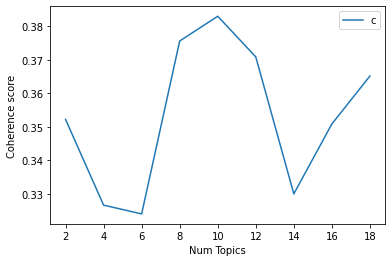

In [210]:
# Show graph
# Can be seen that topic 6 has the lowest score so we should be using that.

limit=20; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

/Users/gowthamasokan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


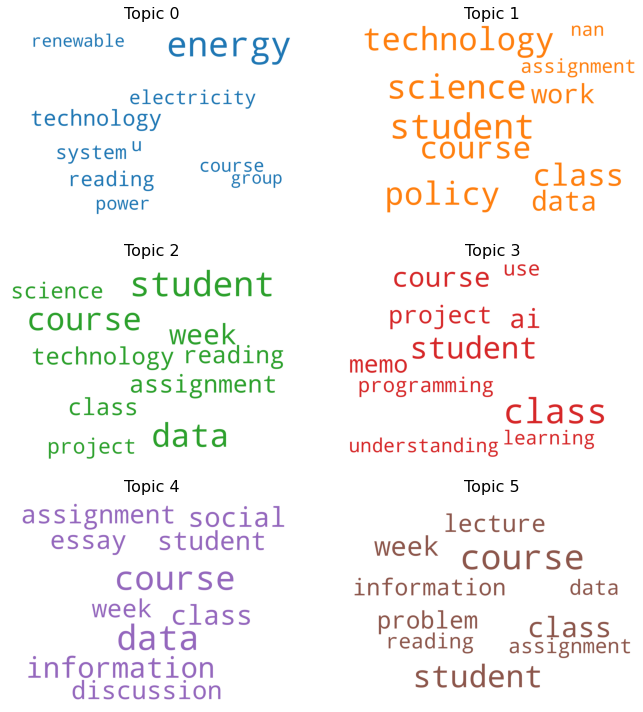

In [168]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(3, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()[0:11]):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [211]:
ldamodel_10 = LDA(doc_term_matrix, num_topics = 10, id2word = dict_, passes=20, random_state=0, eval_every=None)
ldamodel_10.print_topics()

/Users/gowthamasokan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.054*"energy" + 0.012*"technology" + 0.011*"system" + 0.010*"electricity" + 0.009*"renewable" + 0.009*"power" + 0.008*"fuel" + 0.008*"u" + 0.007*"policy" + 0.007*"reading"'),
 (1,
  '0.020*"science" + 0.015*"technology" + 0.015*"policy" + 0.008*"student" + 0.007*"course" + 0.007*"data" + 0.006*"project" + 0.006*"public" + 0.006*"social" + 0.006*"reading"'),
 (2,
  '0.017*"data" + 0.014*"student" + 0.011*"course" + 0.009*"technology" + 0.009*"week" + 0.006*"science" + 0.006*"reading" + 0.006*"page" + 0.006*"lab" + 0.006*"assignment"'),
 (3,
  '0.000*"data" + 0.000*"course" + 0.000*"student" + 0.000*"class" + 0.000*"technology" + 0.000*"week" + 0.000*"reading" + 0.000*"science" + 0.000*"project" + 0.000*"may"'),
 (4,
  '0.021*"data" + 0.013*"course" + 0.010*"justice" + 0.009*"science" + 0.009*"social" + 0.009*"spatial" + 0.008*"class" + 0.007*"r" + 0.007*"assignment" + 0.006*"introduction"'),
 (5,
  '0.010*"course" + 0.008*"student" + 0.007*"bullshit" + 0.006*"learning" + 0.006*

/Users/gowthamasokan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


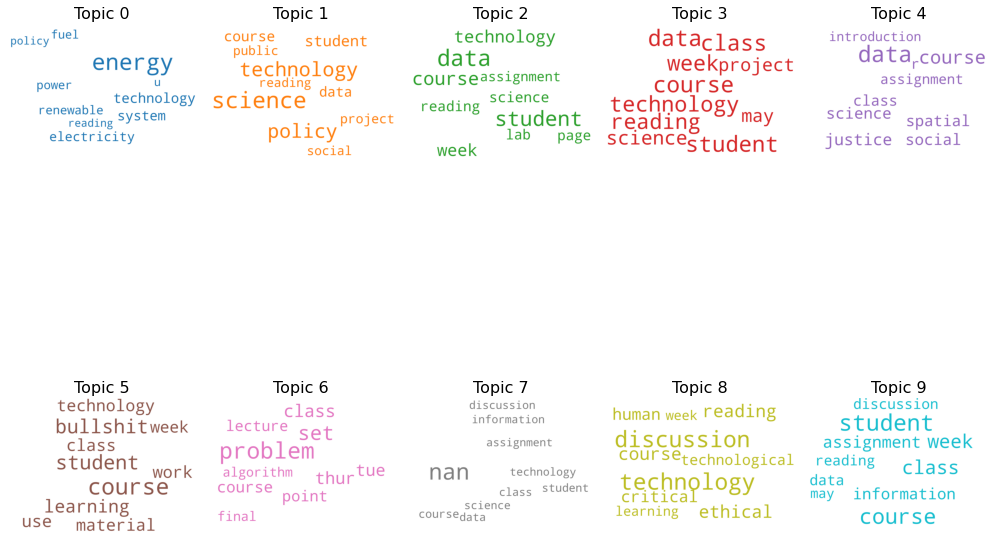

In [215]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel_10.show_topics(formatted=False)

fig, axes = plt.subplots(2, 5, figsize=(14,14), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()[0:11]):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [186]:
topics = ldamodel.show_topics(formatted=False)
topics

/Users/gowthamasokan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  [('energy', 0.03316876),
   ('technology', 0.008801119),
   ('reading', 0.0076566865),
   ('system', 0.007064366),
   ('electricity', 0.0067114844),
   ('u', 0.006053215),
   ('power', 0.005955242),
   ('course', 0.0059173717),
   ('group', 0.005379178),
   ('renewable', 0.005347513)]),
 (1,
  [('student', 0.011172933),
   ('science', 0.010317026),
   ('policy', 0.009416451),
   ('technology', 0.009396164),
   ('course', 0.0088178795),
   ('class', 0.008492768),
   ('data', 0.006863536),
   ('work', 0.0064242603),
   ('assignment', 0.006117338),
   ('nan', 0.0058359685)]),
 (2,
  [('student', 0.015811976),
   ('data', 0.0137577625),
   ('course', 0.013242152),
   ('week', 0.010077397),
   ('assignment', 0.007625207),
   ('reading', 0.007278857),
   ('technology', 0.007154483),
   ('class', 0.0070093796),
   ('science', 0.006119729),
   ('project', 0.005639861)]),
 (3,
  [('class', 0.011695098),
   ('student', 0.008909455),
   ('course', 0.0070554665),
   ('ai', 0.0065778503),
  

In [187]:
data_flat = [w for w_list in clean_corpus for w in w_list]
data_flat

/Users/gowthamasokan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['pit',
 'principle',
 'public',
 'interest',
 'technology',
 'professor',
 'zoom',
 'office',
 'office',
 'hour',
 'tuesday',
 'needed',
 'please',
 'email',
 'schedule',
 'zoom',
 'office',
 'appointment',
 'course',
 'description',
 'course',
 'introduces',
 'student',
 'fundamental',
 'public',
 'interest',
 'technology',
 'pit',
 'including',
 'key',
 'concept',
 'theory',
 'framework',
 'student',
 'identify',
 'analyze',
 'stakeholder',
 'societal',
 'dimension',
 'policy',
 'issue',
 'context',
 'current',
 'emerging',
 'technology',
 'facial',
 'recognition',
 'technology',
 'biotechnology',
 'artificial',
 'intelligence',
 'financial',
 'technology',
 'student',
 'introduced',
 'importance',
 'sociotechnical',
 'change',
 'public',
 'value',
 'anticipatory',
 'governance',
 'disclaimer',
 'syllabus',
 'used',
 'guideline',
 'only',
 'information',
 'provided',
 'summary',
 'topic',
 'covered',
 'class',
 'information',
 'contained',
 'document',
 'assignment',
 'grading',
 's

In [34]:
# 6 topic LDA model

ldamodel_6 = LDA(doc_term_matrix, num_topics = 6, id2word = dict_, passes=200, random_state=0, eval_every=None)

ldamodel_6.print_topics()

[(0,
  '0.044*"energy" + 0.010*"technology" + 0.009*"electricity" + 0.009*"system" + 0.008*"power" + 0.007*"u" + 0.007*"reading" + 0.007*"renewable" + 0.007*"fuel" + 0.006*"sustainable"'),
 (1,
  '0.011*"science" + 0.010*"policy" + 0.009*"technology" + 0.008*"student" + 0.008*"class" + 0.008*"course" + 0.007*"data" + 0.006*"nan" + 0.006*"work" + 0.006*"assignment"'),
 (2,
  '0.017*"student" + 0.014*"course" + 0.012*"data" + 0.010*"week" + 0.007*"technology" + 0.007*"assignment" + 0.007*"class" + 0.007*"reading" + 0.006*"science" + 0.005*"project"'),
 (3,
  '0.012*"class" + 0.009*"student" + 0.007*"course" + 0.007*"ai" + 0.006*"project" + 0.006*"memo" + 0.004*"programming" + 0.004*"use" + 0.003*"understanding" + 0.003*"one"'),
 (4,
  '0.012*"data" + 0.012*"course" + 0.008*"information" + 0.008*"social" + 0.007*"class" + 0.007*"student" + 0.007*"assignment" + 0.007*"essay" + 0.006*"discussion" + 0.006*"justice"'),
 (5,
  '0.014*"course" + 0.011*"student" + 0.009*"class" + 0.008*"week" + 

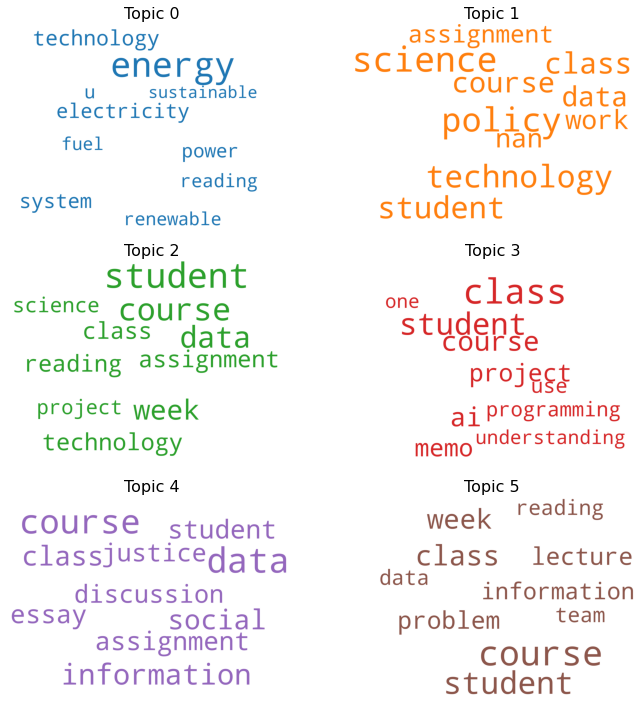

In [35]:
# Let's create the word cloud for the optimal 6 topics

# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel_6.show_topics(formatted=False)

fig, axes = plt.subplots(3, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()[0:11]):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [23]:

flat_corpus = [item for sublist in clean_corpus for item in sublist]
flat_corpus

['pit',
 'principle',
 'public',
 'interest',
 'technology',
 'professor',
 'zoom',
 'office',
 'office',
 'hour',
 'tuesday',
 'needed',
 'please',
 'email',
 'schedule',
 'zoom',
 'office',
 'appointment',
 'course',
 'description',
 'course',
 'introduces',
 'student',
 'fundamental',
 'public',
 'interest',
 'technology',
 'pit',
 'including',
 'key',
 'concept',
 'theory',
 'framework',
 'student',
 'identify',
 'analyze',
 'stakeholder',
 'societal',
 'dimension',
 'policy',
 'issue',
 'context',
 'current',
 'emerging',
 'technology',
 'facial',
 'recognition',
 'technology',
 'biotechnology',
 'artificial',
 'intelligence',
 'financial',
 'technology',
 'student',
 'introduced',
 'importance',
 'sociotechnical',
 'change',
 'public',
 'value',
 'anticipatory',
 'governance',
 'disclaimer',
 'syllabus',
 'used',
 'guideline',
 'only',
 'information',
 'provided',
 'summary',
 'topic',
 'covered',
 'class',
 'information',
 'contained',
 'document',
 'assignment',
 'grading',
 's

In [25]:
frequency_dict = {i:flat_corpus.count(i) for i in set(flat_corpus)}

frequency_dict


[('prescribe', 1),
 ('baloney', 1),
 ('authoritarianism', 1),
 ('acknowledged', 1),
 ('survive', 1),
 ('badly', 1),
 ('videogames', 1),
 ('unstated', 1),
 ('bridge', 1),
 ('sewer', 1),
 ('paraphrased', 1),
 ('yorker', 1),
 ('cocurricular', 1),
 ('grounded', 1),
 ('weblogs', 1),
 ('andrthe', 1),
 ('computed', 1),
 ('disagree', 1),
 ('barrierfree', 1),
 ('janitor', 1),
 ('grass', 1),
 ('incur', 1),
 ('contingency', 1),
 ('exist', 1),
 ('conundrum', 1),
 ('counting', 1),
 ('seedbed', 1),
 ('algal', 1),
 ('exploited', 1),
 ('inqtel', 1),
 ('correlogram', 1),
 ('decrease', 1),
 ('junkyard', 1),
 ('dwarf', 1),
 ('attain', 1),
 ('bigcity', 1),
 ('quantitativelyskilled', 1),
 ('welltrained', 1),
 ('t', 1),
 ('canadian', 1),
 ('moranthomas', 1),
 ('fairnessweek', 1),
 ('renewed', 1),
 ('scratch', 1),
 ('revisited', 1),
 ('multiplatform', 1),
 ('info', 1),
 ('moderator', 1),
 ('reasearch', 1),
 ('progressesin', 1),
 ('reviewmidterm', 1),
 ('enabling', 1),
 ('dimly', 1),
 ('anothermore', 1),
 ('r

In [32]:
#sorted([Player(v,k) for (k,v) in frequency_dict.items()], reverse=True)

#sorted(frequency_dict, key=lambda x : frequency_dict[x])

from collections import Counter

#x = {'hello': 1, 'python': 5, 'world': 3}
c = Counter(frequency_dict)
print(c.most_common())

[('course', 591), ('student', 579), ('data', 460), ('class', 387), ('week', 366), ('technology', 334), ('assignment', 298), ('science', 289), ('reading', 274), ('policy', 231), ('energy', 228), ('information', 225), ('discussion', 212), ('project', 197), ('work', 186), ('social', 184), ('use', 180), ('learning', 180), ('may', 177), ('due', 172), ('final', 156), ('system', 156), ('lecture', 155), ('grade', 150), ('question', 134), ('one', 134), ('analysis', 132), ('time', 129), ('problem', 126), ('page', 124), ('university', 120), ('please', 119), ('material', 119), ('lab', 118), ('design', 111), ('part', 110), ('topic', 110), ('group', 108), ('research', 104), ('instructor', 103), ('study', 102), ('also', 101), ('u', 100), ('introduction', 100), ('presentation', 97), ('need', 97), ('ethical', 94), ('understanding', 92), ('algorithm', 90), ('canvas', 89), ('academic', 89), ('world', 88), ('semester', 88), ('make', 88), ('point', 86), ('exam', 85), ('paper', 85), ('source', 85), ('essay'

(-0.5, 2499.5, 1799.5, -0.5)

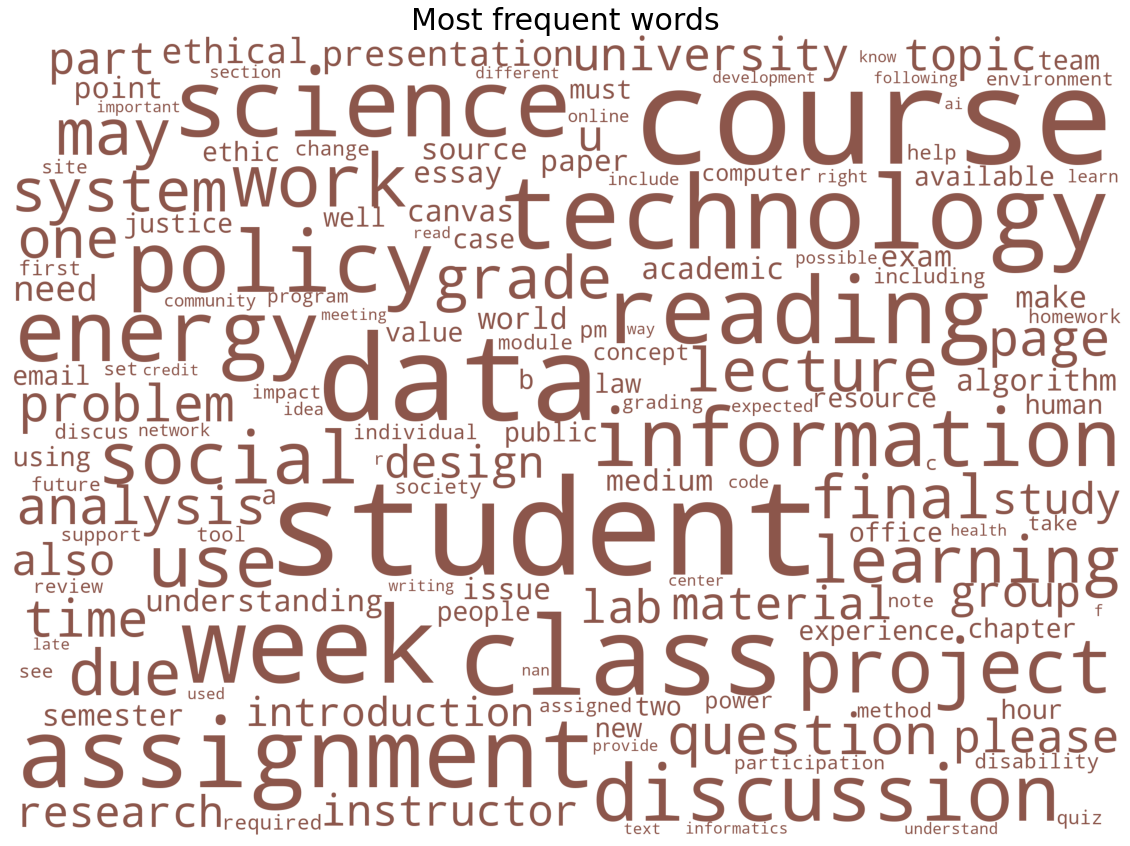

In [42]:
#topics = frequency_dict
#dict(topics[i][1])
fig, axes = plt.subplots(figsize=(20,20), sharex=True, sharey=True)
cloud_150 = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=150,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)
cloud_150.generate_from_frequencies(frequency_dict, max_font_size=300)
plt.gca().imshow(cloud_150)
plt.gca().set_title("Most frequent words", fontdict=dict(size=30))
plt.gca().axis('off')